# RQ2 - Historical usage

Uses:

- resources/historical_join_db.xlsx (HISTORICAL_FILE_JOIN_DB from prepare/historic_count_models.ipynb)
- Variable rq1_projects_with_dbms (rq1/popularity.ipynb)

Generates:

- projects_databases_models2.pdf (fig:projectsperDB)
- venn_datamodels.pdf (fig:venn_datamodels)

Variables:

- rq2_projects
- rq2_projects_with_dbms_history
- rq2_projects_without_dbms_history
- rq2_projects_with_dbms_diff
- rq2_dbms_total
- rq2_mysql
- rq2_h2
- rq2_postgresql
- rq2_oracle
- rq2_redis
- rq2_relational_dbms_found
- rq2_relational
- rq2_ignite_sql_ext
- rq2_ignite_nosql_ext
- rq2_ignite_both_ext
- rq2_dbms_multimodel_combined
- rq2_relational_dbms_found
- rq2_non_relational_dbms_found
- rq2_no_usage_ext
- rq2_relational_projects
- rq2_non_relational_projects
- rq2_intersection_projects
- rq2_single_projects


In [1]:
import sys  
sys.path.insert(1, '..')

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from num2words import num2words
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

from util import RESOURCE_DIR, IMAGES_DIR, HISTORICAL_FILE_JOIN_DB
from analysis_helpers import var, load_vars, relative_var

In [3]:
relational_only_dbs = ['Oracle', 'MySQL', 'MS SQL Server', 'PostgreSQL', 'IBM DB2', 
                  'MS Access', 'SQLite',  'Snowflake', 'Teradata', 'SapHana', 
                  'FileMaker', 'SAP Adaptive Server', 'Informix', 'Firebird', 'Vertica', 
                  'Impala', 'ClickHouse', 'H2',  'Singlestore', 'Interbase', 
                  'Ingres', 'SAP SQL Anywhere', 'HyperSQL']
nonreleational_only_dbs = ['Aerospike', 'ArangoDB', 'Cassandra', 'CouchDB', 'Couchbase',
       'DynamoDB', 'Etcd', 'Firebase Realtime', 'Google Cloud Datastore',
       'GoogleCloudFirestore', 'HBase', 'Hazelcast',
       'Influx DB', 'Kdb+', 'MarkLogic', 'Microsoft Azure CosmosDB',
       'Microsoft Azure Table Storage', 'MongoDB', 'Neo4j', 'PostGIS', 'Realm',
       'Redis', 'Riak KV']
multimodel_relational = ['Ignite-Sql', 'Virtuoso-Sql']
multimodel_non_relational = ['Ignite-NoSql', 'Virtuoso-NoSql']

relational_dbs = relational_only_dbs + multimodel_relational
nonreleational_dbs = nonreleational_only_dbs + multimodel_non_relational
multimodel_dbs = multimodel_relational + multimodel_non_relational


In [4]:
df3 = pd.read_excel(HISTORICAL_FILE_JOIN_DB, keep_default_na=False)
df3['Projects'] = (df3.iloc[:,4:].T > 0).sum()
df3['Model'].replace({'SQL': 'Relational'}, regex=True, inplace=True)
df3['Model'].replace({'NoRelational': 'Non Relational'}, regex=True, inplace=True)
df3.head()

,Databases,Primary Model,Second Model,Model,Activiti/Activiti,Alluxio/alluxio,AlmasB/FXGL,AntennaPod/AntennaPod,AnySoftKeyboard/AnySoftKeyboard,AsyncHttpClient/async-http-client,...,vsch/flexmark-java,webbukkit/dynmap,wildfly/wildfly,winder/Universal-G-Code-Sender,xuxueli/xxl-job,yacy/yacy_search_server,zaproxy/zaproxy,zendesk/maxwell,zxing/zxing,Projects
0,Aerospike,Key-value,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ArangoDB,Multi-Model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,Cassandra,Wide column,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
3,ClickHouse,Relational,Multi-model,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,Couchbase,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


## DBMS and Models

### _Display Models (not organized)

(Not used in the paper)

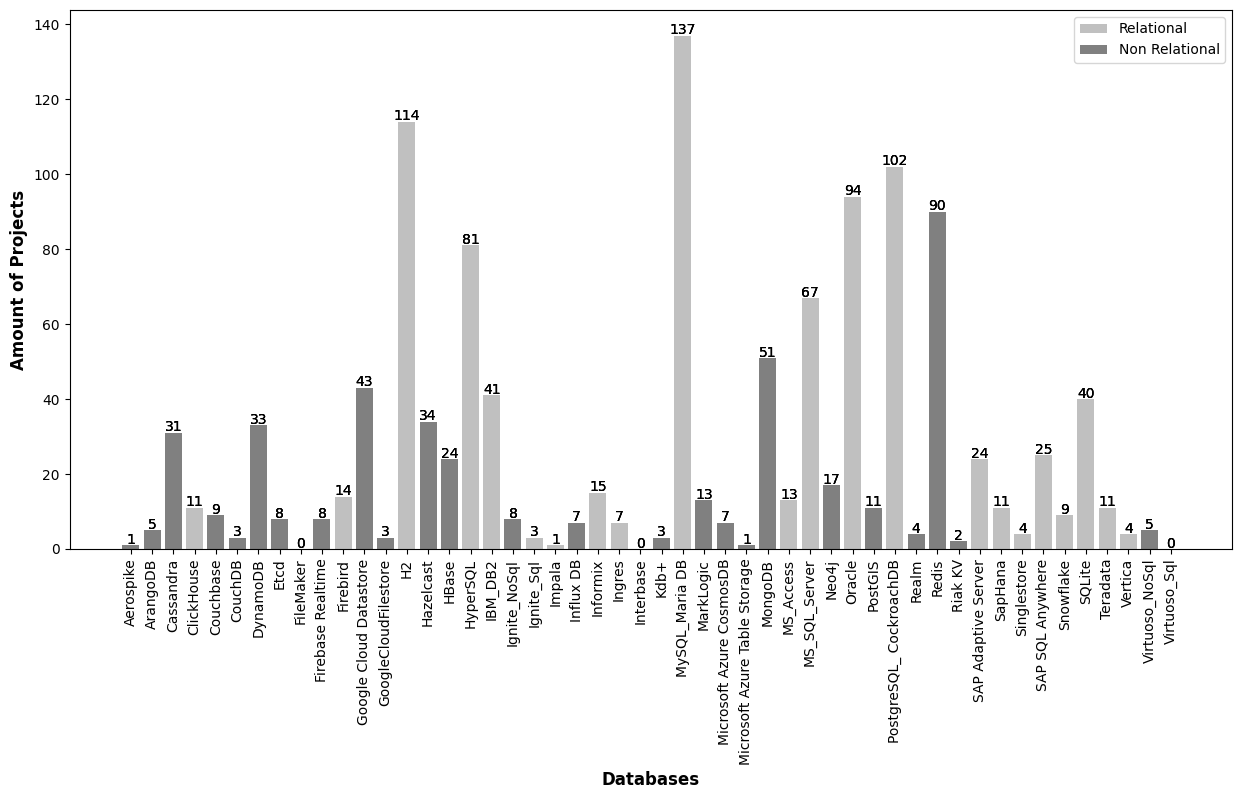

In [5]:
colors = {'Relational':'silver','Non Relational':'gray'}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(15,7))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases", fontweight = 'bold', fontsize=12)
plt.ylabel("Amount of Projects", fontweight = 'bold', fontsize=12)
#plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

#plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Display models

fig:projectsperDB

In [6]:
renomeacoes = {
    'MySQL_Maria DB': 'MySQL',
    'PostgreSQL_ CockroachDB': 'PostgreSQL',
    'MS SQL Server_Microsoft Azure SQL Database': 'MS SQL Server',
    'MS_SQL_Server': 'MS SQL Server',
    'IBM_DB2': 'IBM DB2',
    'Virtuoso_NoSql': 'Virtuoso-NoSql',
    'Virtuoso_Sql': 'Virtuoso-Sql',
    'Ignite_NoSql': 'Ignite-NoSql',
    'Ignite_Sql': 'Ignite-Sql',
    'GoogleCloudFilestore': 'GoogleCloudFirestore',
    'MS_Access': 'MS Access'
}

# Renomeando os valores na coluna 'banco_de_dados'
df3['Databases'] = df3['Databases'].replace(renomeacoes)


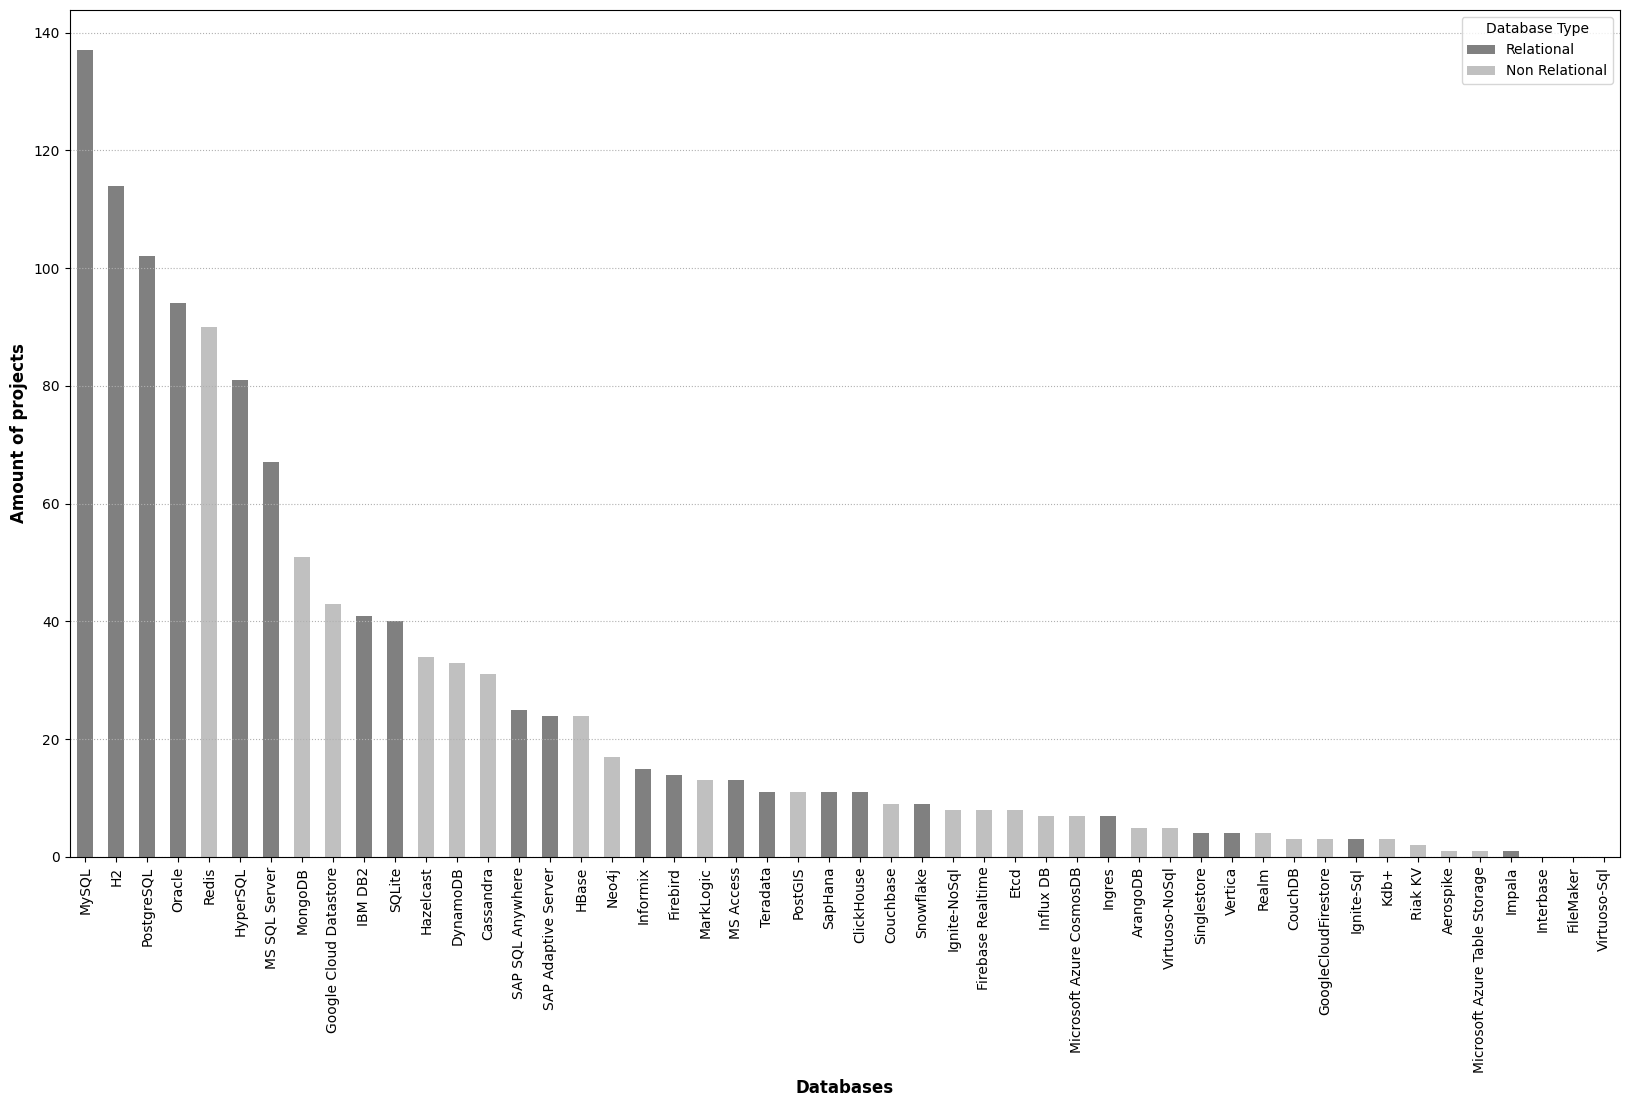

In [7]:
new_df = df3.copy()

# Supondo que seu DataFrame seja chamado df
#df_grouped = new_df.groupby(['Databases'])['Projects'].sum().reset_index()

# Agrupando novamente para separar 'Relational' e 'Non_Relational'
df_grouped = new_df.groupby(['Databases', 'Model'])['Projects'].sum().reset_index()


# Criando a coluna 'Relational' e 'Non_Relational'
df_grouped['Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Relational' else 0, axis=1)
df_grouped['Non Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Non Relational' else 0, axis=1)

df_grouped = df_grouped.reset_index(drop=True)


# Cirando um novo df para facilitar a criação do gráfico
df5 = df_grouped[['Databases', 'Relational', 'Non Relational']].copy()

df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']

df5 = df5.sort_values(by='Amount of Projects', ascending=False)

# Definindo a paleta de cores
plt.rc('axes', prop_cycle=plt.cycler('color', ['gray', 'silver']))

ax = df5.plot(x='Databases', y=['Relational', 'Non Relational'], kind='bar', stacked=True, figsize=(20,11))

# Personalizando o gráfico
ax.set_xlabel("Databases", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Amount of projects", fontsize=12, fontweight = 'bold')
#Incluído para mostrar os valores das barras
ax.legend(title="Database Type")
#ticks = ['']
#plt.xticks(y, ticks)
plt.xticks(rotation=90)
#plt.show()
#for i in ax.patches:
#    if i.get_height() != 0:
#        ax.annotate(int(i.get_height()),(i.get_x() + i.get_width() / 2, i.get_height()),
#        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

plt.grid(axis='y', linestyle=':', linewidth=0.8)

plt.savefig(IMAGES_DIR+"/projects_databases_models2.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Data

In [8]:
data_with_index = df3.set_index('Databases').transpose().iloc[3:-1]

In [9]:
soma_colunas = data_with_index.sum(axis=1)

# Conta quantas colunas têm valor maior que 0 na soma
total_projects = (soma_colunas > 0).sum()
total_without_dbms = (soma_colunas == 0).sum()

all_projects = total_projects + total_without_dbms
print("Sum for each column:\n", soma_colunas, "\n")
print("Project count:", var("rq2_projects", all_projects))
print("Projects with DBMS history:", relative_var("rq2_projects_with_dbms_history", total_projects, all_projects))
print("Projects without DBMS history:", relative_var("rq2_projects_without_dbms_history", total_without_dbms, all_projects))


Sum for each column:
 Activiti/Activiti                  313.0
Alluxio/alluxio                     41.0
AlmasB/FXGL                          0.0
AntennaPod/AntennaPod                0.0
AnySoftKeyboard/AnySoftKeyboard      2.0
                                   ...  
xuxueli/xxl-job                     16.0
yacy/yacy_search_server            187.0
zaproxy/zaproxy                     84.0
zendesk/maxwell                     21.0
zxing/zxing                          0.0
Length: 362, dtype: float64 

Project count: 362
Projects with DBMS history: 234 (64.6%)
Projects without DBMS history: 128 (35.4%)


In [10]:
last_version_dbms = int(load_vars()['rq1_projects_with_dbms'])
print("Projects that stopped using DBMSs:", relative_var("rq2_projects_with_dbms_diff", total_projects - last_version_dbms, all_projects))

Projects that stopped using DBMSs: 32 (8.8%)


In [11]:
dbms_usages = data_with_index.apply(lambda r: (r > 0).sum()).sort_values(ascending=False)
dbms_usages

Databases
MySQL                            137
H2                               114
PostgreSQL                       102
Oracle                            94
Redis                             90
HyperSQL                          81
MS SQL Server                     67
MongoDB                           51
Google Cloud Datastore            43
IBM DB2                           41
SQLite                            40
Hazelcast                         34
DynamoDB                          33
Cassandra                         31
SAP SQL Anywhere                  25
SAP Adaptive Server               24
HBase                             24
Neo4j                             17
Informix                          15
Firebird                          14
MS Access                         13
MarkLogic                         13
SapHana                           11
PostGIS                           11
Teradata                          11
ClickHouse                        11
Couchbase                   

In [12]:
print('Evidence of different DBMS:', var("rq2_dbms_total", (dbms_usages > 0).sum()))

Evidence of different DBMS: 47


In [13]:
assert dbms_usages.idxmax() == 'MySQL', "Paper: 'The top positions are occupied by MySQL,'"
print('Projects with MySQL:', relative_var("rq2_mysql", dbms_usages['MySQL'], total_projects))

Projects with MySQL: 137 (58.5%)


In [14]:
assert dbms_usages.nlargest(2).index[-1] == 'H2', "Paper: 'followed by H2'"
assert dbms_usages.nlargest(2).index[-1] == 'H2', "Paper: 'On the other hand, H2 (Hypersonic 2) is our second most adopted DBMS and occupies the'"
print('Projects with H2:', relative_var("rq2_h2", dbms_usages['H2'], total_projects))

Projects with H2: 114 (48.7%)


In [15]:
assert dbms_usages.nlargest(3).index[-1] == 'PostgreSQL', "Paper: 'PostgreSQL came in third'"
print('Projects with PostgreSQL:', relative_var("rq2_postgresql", dbms_usages['PostgreSQL'], total_projects))

Projects with PostgreSQL: 102 (43.6%)


In [16]:
assert set(dbms_usages.nlargest(3).index) == {'MySQL', 'H2', 'PostgreSQL'}, "Paper: 'MySQL, H2, and PostgreSQL are among the three most used relational DBMSs'"

In [17]:
assert dbms_usages.nlargest(4).index[-1] == 'Oracle', "Paper: 'then Oracle in'"
print('Projects with Oracle:', relative_var("rq2_oracle", dbms_usages['Oracle'], total_projects))

Projects with Oracle: 94 (40.2%)


In [18]:
assert dbms_usages.nlargest(5).index[-1] == 'Redis', "Paper: 'and Redis'"
print('Projects with Redis:', relative_var("rq2_redis", dbms_usages['Redis'], total_projects))

Projects with Redis: 90 (38.5%)


In [19]:
relational_usages = dbms_usages[dbms_usages.index.isin(relational_dbs)]
total_relational_dbms = len(relational_usages)
print("Relational DBMSs Found:", relative_var("rq2_relational_dbms_found", (relational_usages > 0).sum(), total_relational_dbms))

Relational DBMSs Found: 22 (88.0%)


In [20]:
df_relational = data_with_index[relational_dbs]
# Verifica em cada linha se pelo menos um banco relacional foi usado (se há valor 1)
projects_using_relational = df_relational.any(axis=1)
# Conta quantos projetos usaram pelo menos um banco relacional
count_projects = projects_using_relational.sum()
print("Número total de projetos que usaram pelo menos um banco relacional:", 
      relative_var("rq2_relational", count_projects, total_projects))


Número total de projetos que usaram pelo menos um banco relacional: 199 (85.0%)


In [21]:
df_ignite = data_with_index[['Ignite-Sql', 'Ignite-NoSql']]
projects_using_ignite = df_ignite.any(axis=1).sum()
print("Número total de projetos que usaram Ignite:", 
      relative_var("rq2_ignite", projects_using_ignite, total_projects))

projects_using_ignite_sql = len(df_ignite[(df_ignite['Ignite-Sql'] > 0) & (df_ignite['Ignite-NoSql'] == 0)])
projects_using_ignite_nosql = len(df_ignite[(df_ignite['Ignite-Sql'] == 0) & (df_ignite['Ignite-NoSql'] > 0)])
projects_using_ignite_sql_nosql = len(df_ignite[(df_ignite['Ignite-Sql'] > 0) & (df_ignite['Ignite-NoSql'] > 0)])
print('Projects with Ignite-Sql (ext):', var("rq2_ignite_sql_ext", num2words(projects_using_ignite_sql)))
print('Projects with Ignite-NoSql (ext):', var("rq2_ignite_nosql_ext", num2words(projects_using_ignite_nosql)))
print('Projects with Ignite-Both (ext):', var("rq2_ignite_both_ext", num2words(projects_using_ignite_sql_nosql)))

assert projects_using_ignite_sql_nosql > 0, "Paper: 'and one multi-model DBMS (Ignite)'"
assert  len(data_with_index[(data_with_index['Virtuoso-Sql'] > 0) & (data_with_index['Virtuoso-NoSql'] > 0)]) == 0, "Paper: 'and one multi-model DBMS (Ignite)'"


Número total de projetos que usaram Ignite: 9 (3.8%)
Projects with Ignite-Sql (ext): one
Projects with Ignite-NoSql (ext): six
Projects with Ignite-Both (ext): two


In [22]:
data_with_index_multimodel_combined = data_with_index.copy()
data_with_index_multimodel_combined["Virtuoso"] = data_with_index_multimodel_combined["Virtuoso-Sql"] + data_with_index_multimodel_combined["Virtuoso-NoSql"]
data_with_index_multimodel_combined["Ignite"] = data_with_index_multimodel_combined["Ignite-Sql"] + data_with_index_multimodel_combined["Ignite-NoSql"]
data_with_index_multimodel_combined.drop('Virtuoso-Sql', axis=1, inplace=True)
data_with_index_multimodel_combined.drop('Virtuoso-NoSql', axis=1, inplace=True)
data_with_index_multimodel_combined.drop('Ignite-Sql', axis=1, inplace=True)
data_with_index_multimodel_combined.drop('Ignite-NoSql', axis=1, inplace=True)

In [23]:
print('Evidence of different DBMS (without repeating multimodel):',
var("rq2_dbms_multimodel_combined", 
    ((data_with_index_multimodel_combined.apply(lambda r: (r > 0).sum()).sort_values(ascending=False)) > 0).sum()
   )
)


Evidence of different DBMS (without repeating multimodel): 46


In [24]:
relational_usages = dbms_usages[dbms_usages.index.isin(relational_dbs)]
total_relational_dbms = len(relational_usages)
print("Relational DBMSs Found:", relative_var("rq2_relational_dbms_found", (relational_usages > 0).sum(), total_relational_dbms))

Relational DBMSs Found: 22 (88.0%)


In [25]:
non_relational_usages = dbms_usages[dbms_usages.index.isin(nonreleational_dbs)]
total_non_relational_dbms = len(non_relational_usages)
print("Non-Relational DBMSs Found:", relative_var("rq2_non_relational_dbms_found", (non_relational_usages > 0).sum(), total_non_relational_dbms))

Non-Relational DBMSs Found: 25 (100.0%)


In [26]:
assert set(non_relational_usages.nlargest(2).index) == {'Redis', 'MongoDB'}, "Paper: 'while Redis and MongoDB are the most used non-relational DBMSs.'"

In [27]:
assert set(dbms_usages[dbms_usages == 0].index) == {'FileMaker', 'Interbase', 'Virtuoso-Sql'}, "Paper: 'We did not find evidence of usage of three of the 50 DBMSs that we searched for: Virtuoso-SQL, Interbase, and FileMaker'"

In [28]:
print("No evidence of usage:", var("rq2_no_usage_ext", num2words(len(dbms_usages[dbms_usages == 0]))))

No evidence of usage: three


### Venn Diagram

In [29]:
df_relational = data_with_index[relational_dbs]
projects_using_relational = df_relational.any(axis=1)
df_non_relational = data_with_index[nonreleational_dbs]
projects_using_non_relational = df_non_relational.any(axis=1)
projects_using_both = projects_using_relational & projects_using_non_relational

Projects that adopt only relational: 69 (29.5%)
Projects that adopt only non-relational: 35 (15.0%)
Projects that adopt intersection: 130 (55.6%)
Projects that adopt single model: 104 (44.4%)


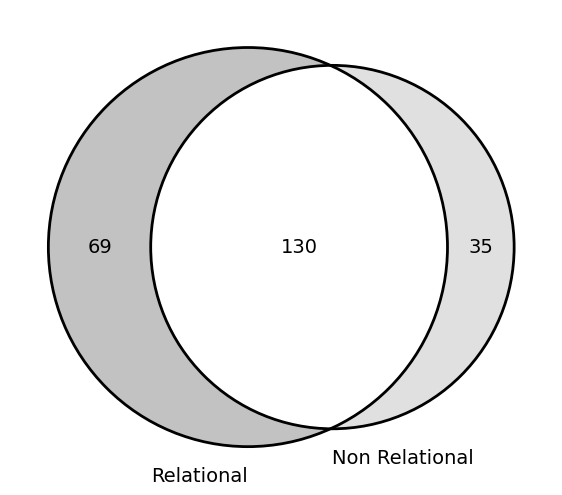

In [30]:
A = projects_using_relational.sum() - projects_using_both.sum()
B = projects_using_non_relational.sum() - projects_using_both.sum()
AB = projects_using_both.sum()

print("Projects that adopt only relational:", relative_var("rq2_relational_projects", A, total_projects))
print("Projects that adopt only non-relational:", relative_var("rq2_non_relational_projects", B, total_projects))
print("Projects that adopt intersection:", relative_var("rq2_intersection_projects", AB, total_projects))
print("Projects that adopt single model:", relative_var("rq2_single_projects", total_projects - AB, total_projects))
assert 0.40 < AB/total_projects < 0.60, "Paper: 'The understanding that both models can complement each other is reflected in about half of the projects that use a DBMS in our corpus'"
assert 0.40 < AB/total_projects < 0.60, "Paper: 'Half of the projects adopted both relational and non-relational databases'"

plt.figure(figsize=(7,7))
venn = venn2(subsets = (A, B, AB), set_labels=('Relational', 'Non Relational'), set_colors=('darkgray', 'lightgray'), alpha= 0.7)
venn2_circles(subsets=(A, B, AB))
for text in venn.set_labels:  #change label size
    text.set_fontsize(14);
for text in venn.subset_labels:  #change number size
    text.set_fontsize(14)
    
plt.savefig(IMAGES_DIR+"/venn_datamodels.pdf", format="pdf", bbox_inches="tight")